# Quantum Harmonic Oscillator Heat Engine: Paper Plots
This Jupyter Notebook produces all plots in the manuscript relative to the quantum harmonic oscillator heat engine if the ```paper_plot_data``` was downloaded. Such data can alternatively be generated using ```0_train.ipynb``` and ```1_produce_pareto.ipynb```. For details on the system, see ```0_train.ipynb```.
#### Import modules

In [1]:
import sys
import os
sys.path.append(os.path.join('..','src'))
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
import plotting

## Produce Fig. 5

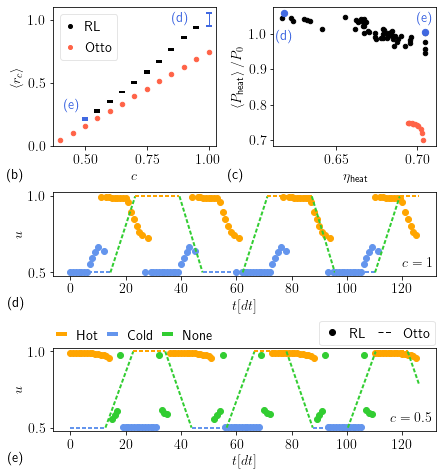

In [2]:
main_dir = "../paper_plot_data/exta_runs/harmonic_engine"

cycle_0_file = os.path.join(main_dir, "2/2022_03_07-22_14_29_a=1.0/saved_policies/det_policy.txt")
cycle_1_file = os.path.join(main_dir, "3/2022_03_06-14_35_56_a=0.5/saved_policies/det_policy.txt") 
selected_cycle_cvals_index = [10, 0]  #these correspond to c_values of [1.,0.8,0.6,0.4]
selected_cycle_repetition_index = [1,2]
actions_to_plot_0 = 126
actions_to_plot_1 = 126
actions_line_style = "scatter"
marker_size=20
prot_linewidth = 36
extra_cycles_linewidth = 1.5
custom_colors=["orange","cornflowerblue","limegreen"]
extra_cycles_0 = plotting.produce_otto_cycle(u_min=0.5,u_max=1.,t1=2.9,t2=1.79,t3=3.2,t4=1.67,dt=0.2,
                                             t_range=[0,actions_to_plot_0*0.2])
extra_cycles_linewidth_0 = 2.
extra_cycles_1 = plotting.produce_otto_cycle(u_min=0.5,u_max=1.,t1=2.54,t2=2.01,t3=2.31,t4=1.9,dt=0.2,
                                             t_range=[0,actions_to_plot_1*0.2])
extra_cycles_linewidth_1 = 2.
rl_legend_lines = [Line2D([0], [0], color='black', linewidth=0., marker="o"), 
                        Line2D([0], [0], color='black', linewidth=1, dashes=(4/0.8,2/0.8))]
rl_legend_text = ["RL","Otto"]
rl_legend_location = [0.72, 0.274]
rl_line_length = 1
rl_column_spacing=0.8
legend_column_spacing=0.8
action_legend_lines_1 = [Line2D([0], [0], color='orange', linewidth=4), 
                        Line2D([0], [0], color='cornflowerblue', linewidth=4),
                        Line2D([0], [0], color='limegreen', linewidth=4)]
action_legend_text_1 = ["Hot","Cold","None"]
action_legend_location_1 = [0., 1.]
legend_line_length_1 = 0.5
legend_line_length_0 = 2
plot_file_name = "fig_5.pdf"

#font size
matplotlib.rcParams.update({'font.size': 14, "text.usetex": True,
                            'text.latex.preamble' : r'\usepackage{amsmath}\usepackage{physics}'})

#create the figure and subplots
fig = plt.figure(constrained_layout=True, figsize=(6,6.5))
gs = gridspec.GridSpec(3, 2, figure=fig, height_ratios = [2,1.2,1.2])
figmerit_ax = fig.add_subplot(gs[0, 0])
pareto_ax = fig.add_subplot(gs[0, 1])
prot_0_ax = fig.add_subplot(gs[1, :])
prot_1_ax = fig.add_subplot(gs[2, :])

#useful dicts to read data
quantity_ind = {'pow': 0, 'entropy': 1, 'eff':2, 'a': 3, 'h': 4}



#load data for plotting
otto_pareto_file = os.path.join(main_dir,"otto_pareto.txt")
rl_pareto_files = [os.path.join(main_dir, subdir, "det_pareto.txt") for subdir in os.listdir(main_dir) if
                          os.path.isdir(os.path.join(main_dir,subdir))]
otto_data = np.loadtxt(otto_pareto_file)
#sort each file by the value of the weight
rl_all_data = []
for i, rl_file in enumerate(rl_pareto_files):
    rl_data = np.loadtxt(rl_file)
    rl_all_data.append(rl_data[rl_data[:, quantity_ind['a']].argsort()])
#put everything in a big numpy array
rl_all_data = np.array(rl_all_data)
#create index of non-selected c-vals
non_selected_cycle_cvals_index = [i for i in range(rl_all_data.shape[1]) if not i in selected_cycle_cvals_index]  

#figmerit panel (panel a)
figmerit_ax.errorbar(rl_all_data[0,non_selected_cycle_cvals_index,quantity_ind["a"]],
                     np.mean(rl_all_data[:,non_selected_cycle_cvals_index,quantity_ind["h"]], axis=0),
                    yerr=0.5*np.std(rl_all_data[:,non_selected_cycle_cvals_index,quantity_ind["h"]], axis=0,ddof=1),
                     markersize=0, fmt="o", label="RL", c="black", capsize=3, linewidth=1, capthick=2)
figmerit_ax.errorbar(rl_all_data[0,selected_cycle_cvals_index,quantity_ind["a"]],
                     np.mean(rl_all_data[:,selected_cycle_cvals_index,quantity_ind["h"]], axis=0),
                    yerr=0.5*np.std(rl_all_data[:,selected_cycle_cvals_index,quantity_ind["h"]], axis=0,ddof=1),
                     markersize=0, fmt="o", c="royalblue", capsize=3, linewidth=1, capthick=2)
figmerit_ax.scatter(otto_data[:,quantity_ind["a"]], otto_data[:,quantity_ind["h"]], s=marker_size,
                    marker="o",label="Otto",c="tomato")
figmerit_ax.set_xlabel(r"$c$")
figmerit_ax.set_ylabel(r"$\ev{r_c}$")
figmerit_ax.legend([Line2D([0], [0], color='black', linewidth=0, marker="o", markersize=4), 
            Line2D([0], [0], color='tomato', linewidth=0, marker="o", markersize=4)],
            ["RL","Otto"], framealpha=0.5,handlelength=0.6,fancybox=True)

#Pareto front (panel b)
pareto_ax.scatter(rl_all_data[:,:,quantity_ind["eff"]].reshape(-1),rl_all_data[:,:,quantity_ind["pow"]].reshape(-1),
                  s=marker_size, marker="o", label="RL", c="black")
pareto_ax.scatter(rl_all_data[selected_cycle_repetition_index,selected_cycle_cvals_index,quantity_ind["eff"]],
                  rl_all_data[selected_cycle_repetition_index,selected_cycle_cvals_index,quantity_ind["pow"]],
                  s=marker_size*2, marker="o", label="RL", c="royalblue")
pareto_ax.scatter(otto_data[:,quantity_ind["eff"]],otto_data[:,quantity_ind["pow"]], s=marker_size,
                  marker="o", label="Otto",c="tomato")
pareto_ax.set_xlabel(r"$\eta_{\text{heat}}$")
pareto_ax.set_ylabel(r"$\ev{P_\text{heat}}/P_0$")
pareto_ax.set_xlim([0.611,0.712])

#first protocol (panel c)
plotting.plot_actions_on_axis(cycle_0_file, prot_0_ax, actions_to_plot=actions_to_plot_0,custom_colors=custom_colors,
                                is_tri=True, k_notation=False, x_count_from_zero=True,
                                linewidth = prot_linewidth, xlabel="$t[dt]$",extra_cycles=extra_cycles_0,
                                extra_cycles_linewidth=extra_cycles_linewidth_0, legend_column_spacing=legend_column_spacing,
                                hide_gray_vertical_line=True,legend_line_length=legend_line_length_0,
                                line_style=actions_line_style)

#second protocol (panel d)
plotting.plot_actions_on_axis(cycle_1_file, prot_1_ax, actions_to_plot=actions_to_plot_1,custom_colors=custom_colors,
                                is_tri=True, k_notation=False, x_count_from_zero=True,
                                linewidth = prot_linewidth, xlabel="$t[dt]$",extra_cycles=extra_cycles_1,
                                extra_cycles_linewidth=extra_cycles_linewidth_1, legend_lines=action_legend_lines_1,
                                legend_text=action_legend_text_1, legend_location=action_legend_location_1,
                                hide_gray_vertical_line=True,legend_line_length=legend_line_length_1,
                                line_style=actions_line_style, legend_column_spacing=legend_column_spacing)

#legend
fig.legend(rl_legend_lines,rl_legend_text,loc=rl_legend_location,fancybox=True, framealpha=0.5,borderaxespad=0.,
                    ncol=2,handlelength=rl_line_length,columnspacing=rl_column_spacing) 

#extra labels 
figmerit_ax.text(0.73,0.89, r"(d)", transform=figmerit_ax.transAxes, color="royalblue")
figmerit_ax.text(0.07,0.27, r"(e)", transform=figmerit_ax.transAxes, color="royalblue")
pareto_ax.text(0.015,0.76, r"(d)", transform=pareto_ax.transAxes, color="royalblue")
pareto_ax.text(0.88,0.89, r"(e)", transform=pareto_ax.transAxes, color="royalblue")

#panel numbering labels
fig.text(-0.28,-0.23, r"(b)",transform=figmerit_ax.transAxes)
fig.text(-0.28,-0.23, r"(c)",transform=pareto_ax.transAxes)
fig.text(-0.118,-0.37, r"(d)",transform=prot_0_ax.transAxes)
fig.text(-0.118,-0.36, r"(e)",transform=prot_1_ax.transAxes)

#extra panel labelling
fig.text(0.91,0.12, r"$c=1$",transform=prot_0_ax.transAxes)
fig.text(0.88,0.12, r"$c=0.5$",transform=prot_1_ax.transAxes)

#save figure
plt.savefig(plot_file_name)
#show
plt.show()

## Produce extra compare plot

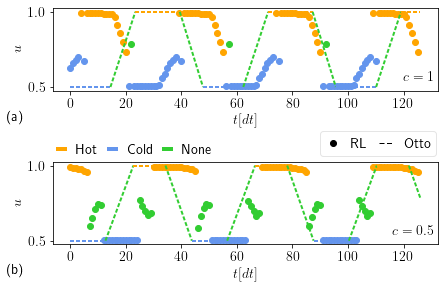

In [48]:
main_dir = "../paper_plot_data/exta_runs/harmonic_engine"

cycle_0_file = os.path.join(main_dir, "5/2022_03_18-00_10_35_a=1.0/saved_policies/det_policy.txt")
cycle_1_file = os.path.join(main_dir, "5/2022_03_17-11_08_48_a=0.5/saved_policies/det_policy.txt") 
actions_to_plot_0 = 126
actions_to_plot_1 = 126
actions_line_style = "scatter"
prot_linewidth = 36
extra_cycles_linewidth = 1.5
custom_colors=["orange","cornflowerblue","limegreen"]
extra_cycles_0 = plotting.produce_otto_cycle(u_min=0.5,u_max=1.,t1=2.9,t2=1.79,t3=3.2,t4=1.67,dt=0.2,
                                             t_range=[0,actions_to_plot_0*0.2])
extra_cycles_linewidth_0 = 2.
extra_cycles_1 = plotting.produce_otto_cycle(u_min=0.5,u_max=1.,t1=2.54,t2=2.01,t3=2.31,t4=1.9,dt=0.2,
                                             t_range=[0,actions_to_plot_1*0.2])
extra_cycles_linewidth_1 = 2.
rl_legend_lines = [Line2D([0], [0], color='black', linewidth=0., marker="o"), 
                        Line2D([0], [0], color='black', linewidth=1, dashes=(4/0.8,2/0.8))]
rl_legend_text = ["RL","Otto"]
rl_legend_location = [0.72, 0.46]
rl_line_length = 1
rl_column_spacing=0.8
legend_column_spacing=0.8
action_legend_lines_1 = [Line2D([0], [0], color='orange', linewidth=4), 
                        Line2D([0], [0], color='cornflowerblue', linewidth=4),
                        Line2D([0], [0], color='limegreen', linewidth=4)]
action_legend_text_1 = ["Hot","Cold","None"]
action_legend_location_1 = [0., 1.]
legend_line_length_1 = 0.5
legend_line_length_0 = 2
plot_file_name = "fig_9.pdf"

#font size
matplotlib.rcParams.update({'font.size': 14, "text.usetex": True,
                            'text.latex.preamble' : r'\usepackage{amsmath}\usepackage{physics}'})

#create the figure and subplots
fig = plt.figure(constrained_layout=True, figsize=(6,3.9))
gs = gridspec.GridSpec(2, 1, figure=fig, height_ratios = [1.2,1.2])
prot_0_ax = fig.add_subplot(gs[0, 0])
prot_1_ax = fig.add_subplot(gs[1, 0])

#useful dicts to read data
quantity_ind = {'pow': 0, 'entropy': 1, 'eff':2, 'a': 3, 'h': 4}

#first protocol (panel a)
plotting.plot_actions_on_axis(cycle_0_file, prot_0_ax, actions_to_plot=actions_to_plot_0,custom_colors=custom_colors,
                                is_tri=True, k_notation=False, x_count_from_zero=True,
                                linewidth = prot_linewidth, xlabel="$t[dt]$",extra_cycles=extra_cycles_0,
                                extra_cycles_linewidth=extra_cycles_linewidth_0, legend_column_spacing=legend_column_spacing,
                                hide_gray_vertical_line=True,legend_line_length=legend_line_length_0,
                                line_style=actions_line_style)

#second protocol (panel b)
plotting.plot_actions_on_axis(cycle_1_file, prot_1_ax, actions_to_plot=actions_to_plot_1,custom_colors=custom_colors,
                                is_tri=True, k_notation=False, x_count_from_zero=True,
                                linewidth = prot_linewidth, xlabel="$t[dt]$",extra_cycles=extra_cycles_1,
                                extra_cycles_linewidth=extra_cycles_linewidth_1, legend_lines=action_legend_lines_1,
                                legend_text=action_legend_text_1, legend_location=action_legend_location_1,
                                hide_gray_vertical_line=True,legend_line_length=legend_line_length_1,
                                line_style=actions_line_style, legend_column_spacing=legend_column_spacing)

#legend
fig.legend(rl_legend_lines,rl_legend_text,loc=rl_legend_location,fancybox=True, framealpha=0.5,borderaxespad=0.,
                    ncol=2,handlelength=rl_line_length,columnspacing=rl_column_spacing) 

#panel numbering labels
fig.text(-0.118,-0.37, r"(a)",transform=prot_0_ax.transAxes)
fig.text(-0.118,-0.36, r"(b)",transform=prot_1_ax.transAxes)

#extra panel labelling
fig.text(0.91,0.12, r"$c=1$",transform=prot_0_ax.transAxes)
fig.text(0.88,0.12, r"$c=0.5$",transform=prot_1_ax.transAxes)

#save figure
plt.savefig(plot_file_name)
#show
plt.show()